### Pangeo: Simple Example CMIP6 Data from Google Cloud Storage in Zarr-format

CMIP6 data is stored Pangeo's Google Cloud Storage as zarr objects. Zarr datastores on the other hand are saved into CSV-file. This example goes through how to access the data in Google Cloud Storage and how to visualize a dataset with maps.

**Packages:**

- matplotlib
- numpy
- cftime
- pandas 
    - *tool for reading data*, *data analysis and manipulation*
- xarray 
    - *for handling of multidimensional arrays*
- zarr 
    - *format for the storage of chunked, compressed, multidimensional arrays*
- fsspec 
    - *for accessing data from Google Cloud Storage*
- gcsfs
    - *for accessing Google Storage*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec 

In [2]:
#read CSV file with pandas from Google Cloud Storage
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [3]:
#filtering data (monthly precipitation for historical experiments)
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'pr' & experiment_id == 'historical'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
994,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r3i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
1773,CMIP,NOAA-GFDL,GFDL-ESM4,historical,r2i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,NaN,20180701
6263,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
22128,CMIP,IPSL,IPSL-CM6A-LR,historical,r8i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
22279,CMIP,IPSL,IPSL-CM6A-LR,historical,r2i1p1f1,Amon,pr,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
...,...,...,...,...,...,...,...,...,...,...,...
523412,CMIP,MRI,MRI-ESM2-0,historical,r6i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,NaN,20210907
523675,CMIP,KIOST,KIOST-ESM,historical,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/CMIP/KIOST/KIOST-ESM/historic...,NaN,20210928
523713,CMIP,CMCC,CMCC-CM2-SR5,historical,r3i1p2f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211108
523727,CMIP,CMCC,CMCC-CM2-SR5,historical,r2i1p2f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-SR5/histor...,NaN,20211109


In [4]:
#more filtering (show only models from NCAR)
df_ta_ncar = df_ta.query('institution_id == "NCAR"')
df_ta_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
69312,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190401
69313,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190401
69387,CMIP,NCAR,CESM2,historical,r7i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r7...,NaN,20190401
69389,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190401
69399,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190401
69440,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190401
69455,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190401
69458,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190401
77652,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190415
77727,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190415


In [5]:
#different models
models = df_ta_ncar.source_id.unique()
models

array(['CESM2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CESM2-FV2'],
      dtype=object)

In [6]:
#choosing specific dataset 
df_ta_9 = df_ta_ncar.query('member_id == "r9i1p1f1"')
df_ta_9

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
409593,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,pr,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9...,NaN,20200124


In [7]:
#getting the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta_9.zstore.values[0]
print(zstore)

#creating a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore)

#opening it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9i1p1f1/Amon/pr/gn/v20200124/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    ...                     ...
    variable_id:            pr
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/53b3ebd8-4505-45cb-8303-e47364fd2123
    version_id:             v20200124

In [8]:
#this is incase you want to change the unit [kg/m²/s] to [mm/day]
pr  = ds.pr * 86400
name = ds.pr.long_name
units = 'mm/day' 

In [9]:
#choose time you want to plot
t = '2012-12'

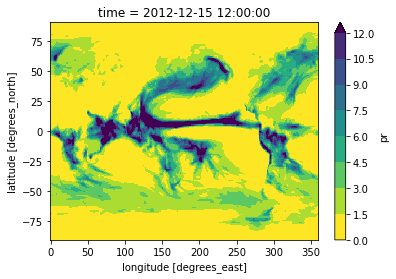

In [10]:
#even if data can be vizualied without cartopy, but adding coastlines with cartopy makes the map much clearer
pr.sel(time = t).squeeze().plot(levels=np.arange(0, 13.5, 1.5), cmap='viridis_r')

Text(0.5, 1.0, 'Precipitation 2012-12')

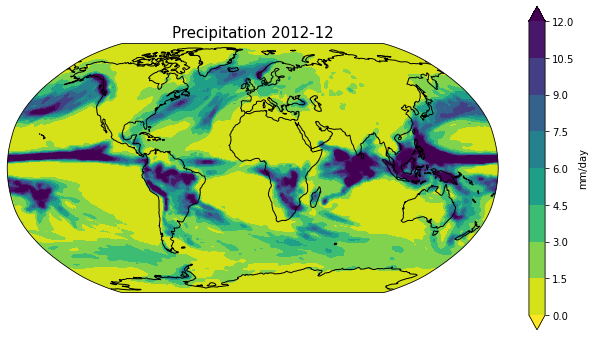

In [11]:
#with cartopy there is even more ways to adjust maps
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

#creating map with robinson style projection
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())

#defining data and coordinates
data= pr.sel(time= t)
data, lons = add_cyclic_point(data, coord=ds.lon)
lats = ds.lat

cs = plt.contourf(lons, lats, data.squeeze(), levels=np.arange(0, 13.5, 1.5), transform = ccrs.PlateCarree(), cmap='viridis_r', extend='both')

#adding coastlines
ax.coastlines()

#adding horizontal colorbar and title
cbar = plt.colorbar(cs,shrink=0.7,orientation='vertical', label=f'{units}')
plt.title(f'{name} {t}', size=15)